In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spectre.IO.Exporter import interpolate_to_points
from spectre.Visualization.OpenVolfiles import open_volfiles
from spectre.Visualization.ReadH5 import list_observations

In [39]:
def load_data(var):
    dir = f"/Users/nilsvu/Downloads/scalar data/{dirname}"
    return np.loadtxt(dir + f"/{var}_{dirname}.dat")


def get_dirname(a, r, m):
    return f"a{a:.2f}_r{r:.2f}_m{m:d}"

-60.096818658607006 359.903181341393


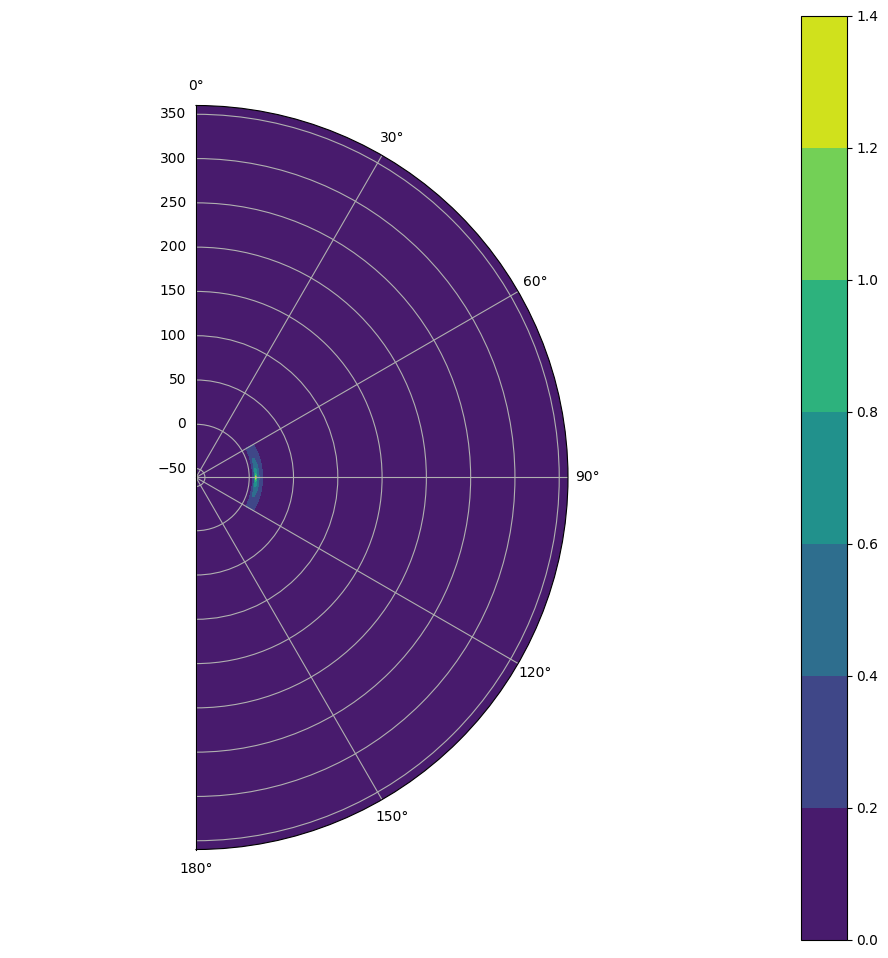

In [40]:
dirname = get_dirname(a=0.6, r=6, m=1)
rstars = load_data("rstars")
thetas = load_data("thetas")

print(rstars[0], rstars[-1])


def get_polarplot():
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_thetamin(0)
    ax.set_thetamax(180)
    return fig, ax


fig, ax = get_polarplot()
data = load_data("puncRe")
contours = ax.contourf(data, extent=[0, np.pi, rstars[0], rstars[-1]])
plt.colorbar(contours);

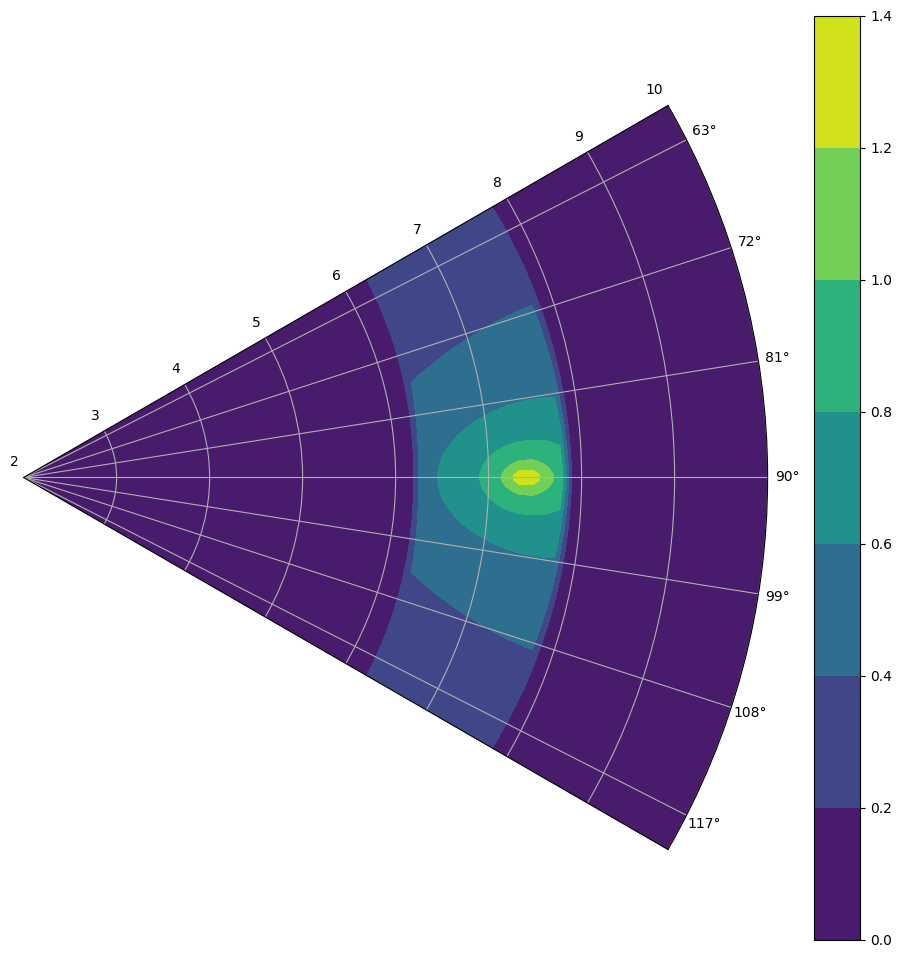

In [45]:
h5files = [
    "/Users/nilsvu/Projects/spectre/build-Default-Debug/test_self_force_m1/ScalarSelfForceVolume0.h5"
]
obs_ids, _ = list_observations(open_volfiles(h5files, "/VolumeData"))
rr, tt = np.meshgrid(rstars, thetas)
data = (
    np.array(
        interpolate_to_points(
            h5files,
            "/VolumeData",
            observation_id=obs_ids[-1],
            tensor_components=["Re(SingularField)"],
            # tensor_components=["BoyerLindquistRadius"],
            target_points=[rr.flatten(), tt.flatten()],
        )[0]
    )
    .reshape(rr.shape)
    .T
)

fig, ax = get_polarplot()
ax.set_xlim(np.pi / 2 - np.pi / 6, np.pi / 2 + np.pi / 6)
ax.set_ylim(2, 10)
contours = plt.contourf(
    data,# - load_data("puncRe"),
    extent=[0, np.pi, rstars[0], rstars[-1]],
    # levels=np.linspace(1, 2, 4),
)
plt.colorbar(contours)

/var/folders/xp/5t2ny359187c4ljckf8sz3m80000gn/T/ipykernel_56998/2085734587.py:19: RuntimeWarning: invalid value encountered in subtract
  load_data("psiRe") + load_data("puncRe") - psi - data,


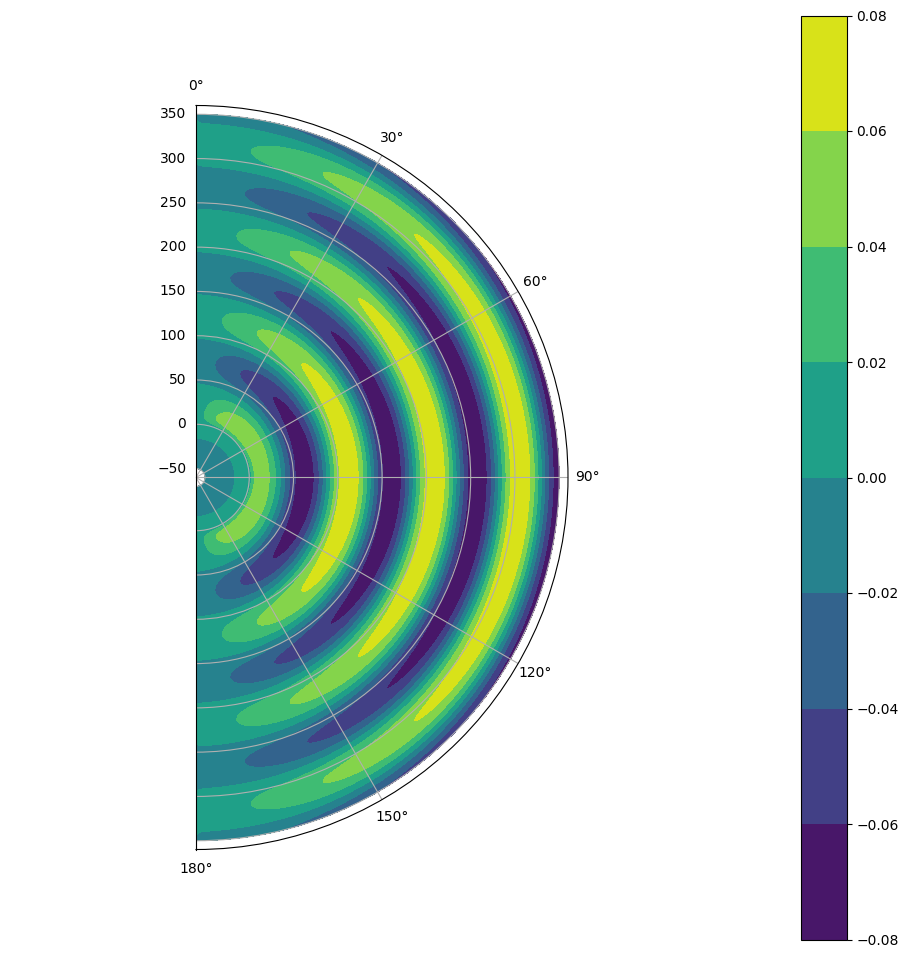

In [48]:
psi = (
    np.array(
        interpolate_to_points(
            h5files,
            "/VolumeData",
            observation_id=obs_ids[-1],
            tensor_components=["MMode_x", "MMode_y"],
            target_points=[rr.flatten(), tt.flatten()],
        )[0]
    )
    .reshape(rr.shape)
    .T
)

fig, ax = get_polarplot()
# ax.set_xlim(np.pi / 2 - np.pi / 6, np.pi / 2 + np.pi / 6)
ax.set_ylim(2, 10)
contours = plt.contourf(
    load_data("psiRe") + load_data("puncRe") - psi - data,
    extent=[0, np.pi, rstars[0], rstars[-1]],
    # levels=np.linspace(1, 2, 4),
)
plt.colorbar(contours)